In [2]:
import numpy as np

def generate_symmetric_matrix(size, min_val=1, max_val=10):
    """
    Generate a symmetric matrix with zeros on the diagonal.
    
    :param size: The size of the square matrix.
    :param min_val: Minimum value for off-diagonal elements.
    :param max_val: Maximum value for off-diagonal elements.
    :return: A symmetric matrix with zeros on the diagonal.
    """
    # Initialize matrix with zeros
    matrix = np.zeros((size, size), dtype=int)
    
    # Fill upper triangular part with random values
    for i in range(size):
        for j in range(i + 1, size):
            matrix[i, j] = np.random.randint(min_val, max_val + 1)
            matrix[j, i] = matrix[i, j]  # Mirror to lower triangular part
    
    return matrix

# Example usage

size = 30
matrix = generate_symmetric_matrix(size)


print(matrix)
matrix

[[ 0  8  6  9  2  3  8  3  2  8  4 10  2  9  3  9  3  1  3  4  2  6  4  1
   4  1  1  4  1  6]
 [ 8  0 10  8 10  6  9  2  8  8  6  2  4  3  8  3  7  2  4  2  6  7  7 10
   5  9  9  2  3  6]
 [ 6 10  0  6  6  1  7  9  8  6  6  8  2  7  1  6  8  5  4  6  6 10  3  8
   9  7  3  4  6  9]
 [ 9  8  6  0  2  1 10  9  2  1  2  9 10  6  5  5  2  2  8  1  1  8 10  5
   1  4  9  4  1 10]
 [ 2 10  6  2  0  8  4  7  5  6  7  5 10  8  2  2  5  2  5 10  1 10  1  5
   1  4  9  1  9  8]
 [ 3  6  1  1  8  0  7  2  5  7  7 10  3  8  8  3  8  2  5  3  5  3  4  9
   1  8  6  2  3  5]
 [ 8  9  7 10  4  7  0  8  9  8  3  4 10  1  1  3  2  7  7  8  8  9  1  7
   1 10 10  1 10  5]
 [ 3  2  9  9  7  2  8  0  6  7  9  8  1  5 10  3  6  8  7  9  9  3  8  2
   8  1  2  7  5  1]
 [ 2  8  8  2  5  5  9  6  0  5  2  8  3  4  6  7  3  1  7  2  6  1 10  9
   6  2  6  5  7  6]
 [ 8  8  6  1  6  7  8  7  5  0  7  1  2  3  2  9  6  9  8  7  3 10  6  1
   5  9  5  1  7  3]
 [ 4  6  6  2  7  7  3  9  2  7  0  6  4  7  7  2 

array([[ 0,  8,  6,  9,  2,  3,  8,  3,  2,  8,  4, 10,  2,  9,  3,  9,
         3,  1,  3,  4,  2,  6,  4,  1,  4,  1,  1,  4,  1,  6],
       [ 8,  0, 10,  8, 10,  6,  9,  2,  8,  8,  6,  2,  4,  3,  8,  3,
         7,  2,  4,  2,  6,  7,  7, 10,  5,  9,  9,  2,  3,  6],
       [ 6, 10,  0,  6,  6,  1,  7,  9,  8,  6,  6,  8,  2,  7,  1,  6,
         8,  5,  4,  6,  6, 10,  3,  8,  9,  7,  3,  4,  6,  9],
       [ 9,  8,  6,  0,  2,  1, 10,  9,  2,  1,  2,  9, 10,  6,  5,  5,
         2,  2,  8,  1,  1,  8, 10,  5,  1,  4,  9,  4,  1, 10],
       [ 2, 10,  6,  2,  0,  8,  4,  7,  5,  6,  7,  5, 10,  8,  2,  2,
         5,  2,  5, 10,  1, 10,  1,  5,  1,  4,  9,  1,  9,  8],
       [ 3,  6,  1,  1,  8,  0,  7,  2,  5,  7,  7, 10,  3,  8,  8,  3,
         8,  2,  5,  3,  5,  3,  4,  9,  1,  8,  6,  2,  3,  5],
       [ 8,  9,  7, 10,  4,  7,  0,  8,  9,  8,  3,  4, 10,  1,  1,  3,
         2,  7,  7,  8,  8,  9,  1,  7,  1, 10, 10,  1, 10,  5],
       [ 3,  2,  9,  9,  7,  2,  8,  0,  

In [16]:


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_total_distance(route, dist_matrix):
    """Calculate the total distance of a route."""
    n = len(route)
    return sum(dist_matrix[route[i]][route[(i + 1) % n]] for i in range(n))

def generate_initial_route(n, start_city):
    """Generate a permutation starting with a specific city."""
    remaining_cities = [city for city in range(n) if city != start_city]
    np.random.shuffle(remaining_cities)
    return [start_city] + remaining_cities

def generate_neighbor(route):
    """Swap two adjacent cities in the route (with wraparound)."""
    n = len(route)
    i = np.random.randint(n)
    j = (i + 1) % n
    new_route = route.copy()
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route, i

def calculate_delta(route, swapped_index, dist_matrix):
    """Compute the change in distance from swapping adjacent cities."""
    n = len(route)
    i = swapped_index
    j = (i + 1) % n
    prev = (i - 1) % n
    next_ = (j + 1) % n
    
    a, b, c, d = route[prev], route[i], route[j], route[next_]
    
    old_cost = dist_matrix[a][b] + dist_matrix[b][c] + dist_matrix[c][d]
    new_cost = dist_matrix[a][c] + dist_matrix[c][b] + dist_matrix[b][d]
    return new_cost - old_cost

def tsp_mcmc(dist_matrix, num_iter, T, start_city=0):
    """MCMC algorithm for solving TSP with a fixed starting point."""
    n = len(dist_matrix)
    np.random.seed(10)  # Fix the random seed
    current_route = generate_initial_route(n, start_city)
    current_distance = calculate_total_distance(current_route, dist_matrix)
    best_route, best_distance = current_route.copy(), current_distance
    
    for _ in range(num_iter):
        new_route, swapped_i = generate_neighbor(current_route)
        
        # Ensure the start city remains fixed
        if new_route[0] != start_city:
            new_route = [start_city] + new_route[1:]
            # Adjust swapped_i if necessary
            if swapped_i == 0:
                swapped_i = 1
            elif swapped_i > 0:
                swapped_i -= 1
        
        delta = calculate_delta(current_route, swapped_i, dist_matrix)
        
        if delta < 0 or (T > 0 and np.random.rand() < np.exp(-delta / T)):
            current_route = new_route
            current_distance += delta
            
            if current_distance < best_distance:
                best_route, best_distance = current_route.copy(), current_distance
                
    return best_route, best_distance

# Example usage
dist_matrix = np.array([[ 0,  8,  6,  9,  2,  3,  8,  3,  2,  8,  4, 10,  2,  9,  3,  9,
         3,  1,  3,  4,  2,  6,  4,  1,  4,  1,  1,  4,  1,  6],
       [ 8,  0, 10,  8, 10,  6,  9,  2,  8,  8,  6,  2,  4,  3,  8,  3,
         7,  2,  4,  2,  6,  7,  7, 10,  5,  9,  9,  2,  3,  6],
       [ 6, 10,  0,  6,  6,  1,  7,  9,  8,  6,  6,  8,  2,  7,  1,  6,
         8,  5,  4,  6,  6, 10,  3,  8,  9,  7,  3,  4,  6,  9],
       [ 9,  8,  6,  0,  2,  1, 10,  9,  2,  1,  2,  9, 10,  6,  5,  5,
         2,  2,  8,  1,  1,  8, 10,  5,  1,  4,  9,  4,  1, 10],
       [ 2, 10,  6,  2,  0,  8,  4,  7,  5,  6,  7,  5, 10,  8,  2,  2,
         5,  2,  5, 10,  1, 10,  1,  5,  1,  4,  9,  1,  9,  8],
       [ 3,  6,  1,  1,  8,  0,  7,  2,  5,  7,  7, 10,  3,  8,  8,  3,
         8,  2,  5,  3,  5,  3,  4,  9,  1,  8,  6,  2,  3,  5],
       [ 8,  9,  7, 10,  4,  7,  0,  8,  9,  8,  3,  4, 10,  1,  1,  3,
         2,  7,  7,  8,  8,  9,  1,  7,  1, 10, 10,  1, 10,  5],
       [ 3,  2,  9,  9,  7,  2,  8,  0,  6,  7,  9,  8,  1,  5, 10,  3,
         6,  8,  7,  9,  9,  3,  8,  2,  8,  1,  2,  7,  5,  1],
       [ 2,  8,  8,  2,  5,  5,  9,  6,  0,  5,  2,  8,  3,  4,  6,  7,
         3,  1,  7,  2,  6,  1, 10,  9,  6,  2,  6,  5,  7,  6],
       [ 8,  8,  6,  1,  6,  7,  8,  7,  5,  0,  7,  1,  2,  3,  2,  9,
         6,  9,  8,  7,  3, 10,  6,  1,  5,  9,  5,  1,  7,  3],
       [ 4,  6,  6,  2,  7,  7,  3,  9,  2,  7,  0,  6,  4,  7,  7,  2,
         4,  3, 10,  2,  2, 10,  5, 10,  4,  3,  2,  1,  6,  6],
       [10,  2,  8,  9,  5, 10,  4,  8,  8,  1,  6,  0,  9,  3,  1,  7,
         6,  3,  1,  6, 10,  9,  8,  5,  4,  9,  9,  4,  5,  2],
       [ 2,  4,  2, 10, 10,  3, 10,  1,  3,  2,  4,  9,  0,  6,  8,  6,
        10,  5,  3, 10,  2,  7,  6,  5,  6,  3, 10,  3, 10,  2],
       [ 9,  3,  7,  6,  8,  8,  1,  5,  4,  3,  7,  3,  6,  0,  2,  6,
         3,  1,  4,  7,  4,  6,  9,  4,  7,  4,  9,  1,  4,  6],
       [ 3,  8,  1,  5,  2,  8,  1, 10,  6,  2,  7,  1,  8,  2,  0,  5,
         4,  3,  9, 10,  2,  1,  6,  1,  4, 10,  9,  7,  3,  8],
       [ 9,  3,  6,  5,  2,  3,  3,  3,  7,  9,  2,  7,  6,  6,  5,  0,
         4,  2,  8,  4,  4,  2,  2,  9,  4,  3,  3,  3,  3, 10],
       [ 3,  7,  8,  2,  5,  8,  2,  6,  3,  6,  4,  6, 10,  3,  4,  4,
         0,  1,  8,  6,  8,  3,  2,  2,  8,  8,  1,  5, 10,  7],
       [ 1,  2,  5,  2,  2,  2,  7,  8,  1,  9,  3,  3,  5,  1,  3,  2,
         1,  0,  9,  8,  1, 10, 10,  7,  7,  4,  9, 10,  9,  3],
       [ 3,  4,  4,  8,  5,  5,  7,  7,  7,  8, 10,  1,  3,  4,  9,  8,
         8,  9,  0, 10,  5, 10,  3,  6,  5,  9,  6,  4,  4,  3],
       [ 4,  2,  6,  1, 10,  3,  8,  9,  2,  7,  2,  6, 10,  7, 10,  4,
         6,  8, 10,  0,  1,  5,  5,  2,  4,  1,  5,  6,  6,  9],
       [ 2,  6,  6,  1,  1,  5,  8,  9,  6,  3,  2, 10,  2,  4,  2,  4,
         8,  1,  5,  1,  0, 10,  2,  4,  2,  4,  9,  1,  3,  1],
       [ 6,  7, 10,  8, 10,  3,  9,  3,  1, 10, 10,  9,  7,  6,  1,  2,
         3, 10, 10,  5, 10,  0,  6,  4,  6,  7,  5,  3,  7, 10],
       [ 4,  7,  3, 10,  1,  4,  1,  8, 10,  6,  5,  8,  6,  9,  6,  2,
         2, 10,  3,  5,  2,  6,  0,  1,  8,  3,  2,  6,  9,  7],
       [ 1, 10,  8,  5,  5,  9,  7,  2,  9,  1, 10,  5,  5,  4,  1,  9,
         2,  7,  6,  2,  4,  4,  1,  0,  4,  2,  7,  6,  7,  4],
       [ 4,  5,  9,  1,  1,  1,  1,  8,  6,  5,  4,  4,  6,  7,  4,  4,
         8,  7,  5,  4,  2,  6,  8,  4,  0,  6,  3,  1,  2,  9],
       [ 1,  9,  7,  4,  4,  8, 10,  1,  2,  9,  3,  9,  3,  4, 10,  3,
         8,  4,  9,  1,  4,  7,  3,  2,  6,  0,  2,  7,  7,  6],
       [ 1,  9,  3,  9,  9,  6, 10,  2,  6,  5,  2,  9, 10,  9,  9,  3,
         1,  9,  6,  5,  9,  5,  2,  7,  3,  2,  0,  6,  4,  6],
       [ 4,  2,  4,  4,  1,  2,  1,  7,  5,  1,  1,  4,  3,  1,  7,  3,
         5, 10,  4,  6,  1,  3,  6,  6,  1,  7,  6,  0,  3,  2],
       [ 1,  3,  6,  1,  9,  3, 10,  5,  7,  7,  6,  5, 10,  4,  3,  3,
        10,  9,  4,  6,  3,  7,  9,  7,  2,  7,  4,  3,  0, 10],
       [ 6,  6,  9, 10,  8,  5,  5,  1,  6,  3,  6,  2,  2,  6,  8, 10,
         7,  3,  3,  9,  1, 10,  7,  4,  9,  6,  6,  2, 10,  0]])

# dist_matrix = matrix

start_city = 18  # Start from city 0
num_iter = 10000
T = 0.000001

best_route, best_distance = tsp_mcmc(dist_matrix, num_iter, T, start_city)
print(f"Best Route: {best_route}, Distance: {best_distance}")



Best Route: [18, 14, 7, 5, 2, 12, 21, 27, 13, 11, 1, 19, 23, 6, 24, 28, 3, 10, 29, 20, 22, 26, 16, 8, 0, 25, 15, 17, 4, 9], Distance: 96


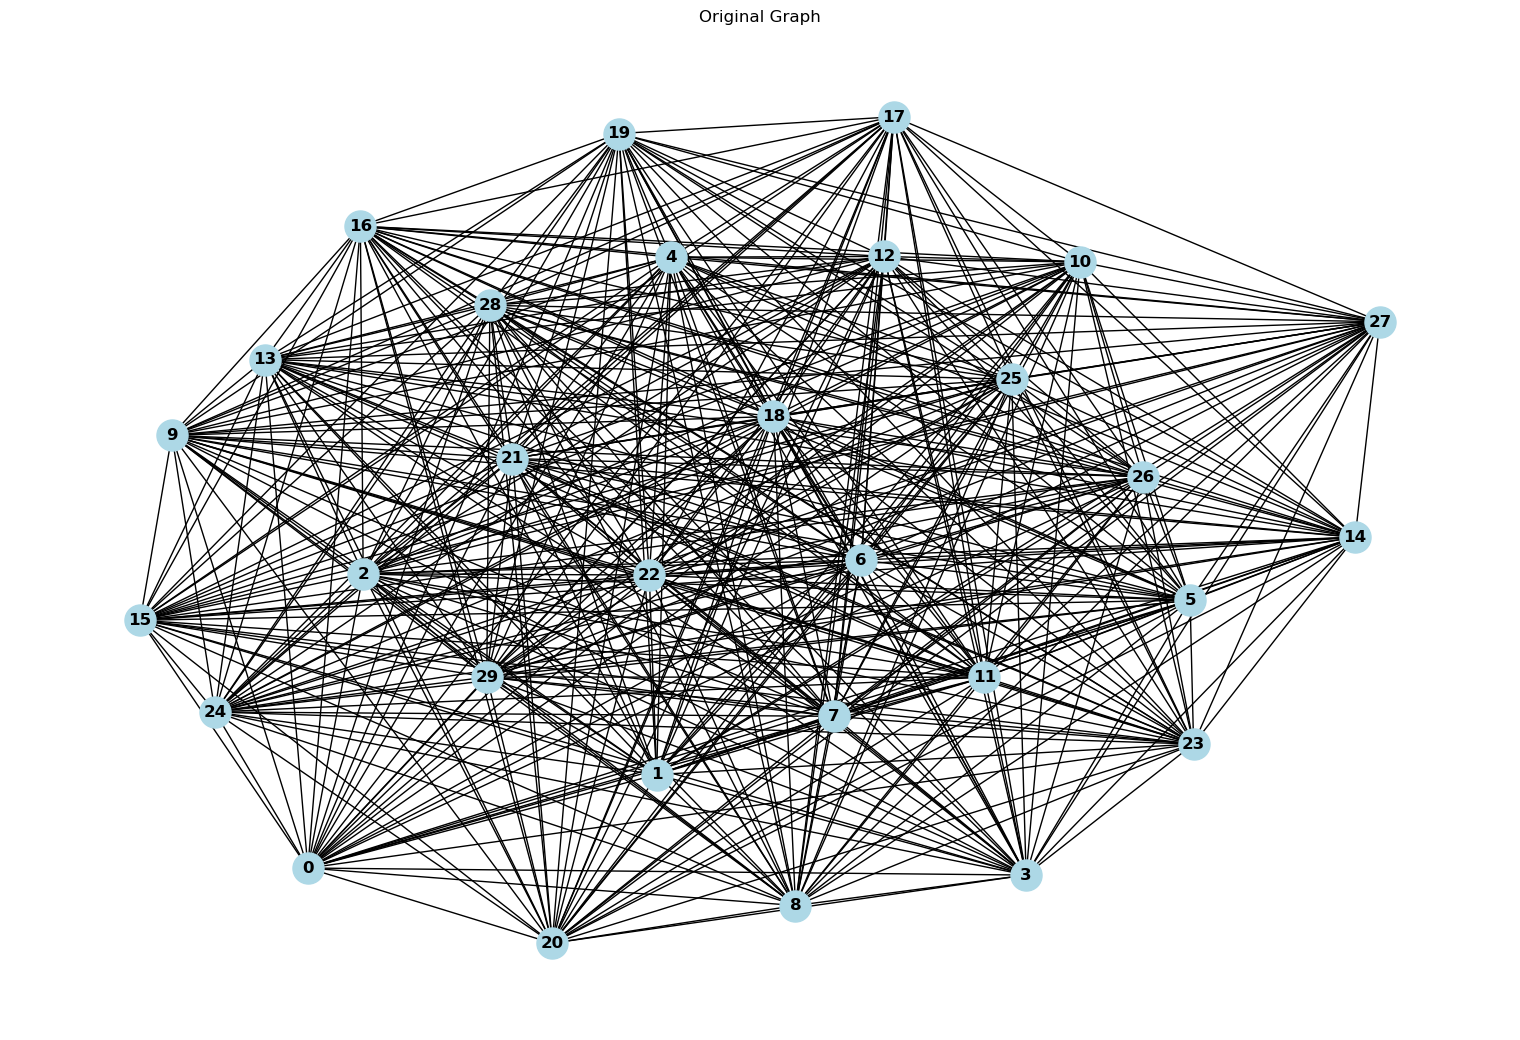

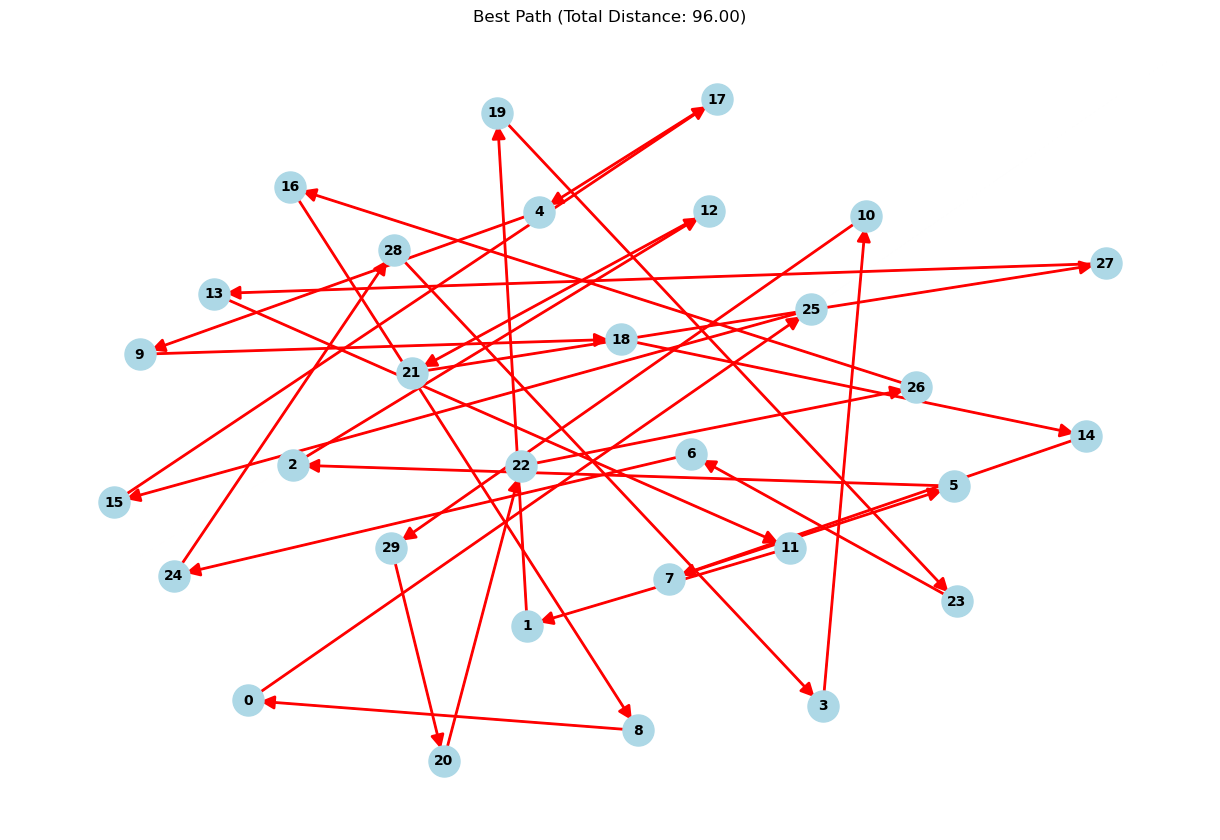

Best Path: 18 -> 14 -> 7 -> 5 -> 2 -> 12 -> 21 -> 27 -> 13 -> 11 -> 1 -> 19 -> 23 -> 6 -> 24 -> 28 -> 3 -> 10 -> 29 -> 20 -> 22 -> 26 -> 16 -> 8 -> 0 -> 25 -> 15 -> 17 -> 4 -> 9
Total Distance: 96.00


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Assign names to nodes (numbers starting from 0)
node_names = [str(i) for i in range(len(dist_matrix))]

# Create a graph from the distance matrix
G = nx.Graph()
for i in range(len(dist_matrix)):
    for j in range(i+1, len(dist_matrix)):
        G.add_edge(node_names[i], node_names[j], weight=dist_matrix[i][j])

# Plot the original graph
plt.figure(figsize=(15, 10))  # Increased figure size
pos = nx.spring_layout(G, k=0.5)  # Adjusted spring layout parameter
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=12, font_weight='bold')
# edge_labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.axis('off')  # Turn off axis to focus on graph
plt.title("Original Graph")
plt.show()

# Plot the best path
best_path = [node_names[i] for i in best_route]
best_path_edges = list(zip(best_path, best_path[1:] + [best_path[0]]))

# Convert to a directed graph for arrows
DG = nx.DiGraph()
for edge in best_path_edges:
    DG.add_edge(*edge)

plt.figure(figsize=(12, 8))
nx.draw(DG, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
nx.draw_networkx_edges(DG, pos, edgelist=best_path_edges, edge_color='r', width=2, arrows=True, arrowsize=20)
plt.title(f"Best Path (Total Distance: {best_distance:.2f})")
plt.show()

print(f"Best Path: {' -> '.join(best_path)}")
print(f"Total Distance: {best_distance:.2f}")
